# [Projects] 택시 이용 내역 Data Cleaning

택시 이용 내역이 담긴 trip.csv 데이터를 기반으로

다양한 변수들을 활용하여 “택시 요금”을 예측한다는 가정하에 데이터를 정제해 본다.

In [9]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
trip_df = pd.read_csv('/content/drive/MyDrive/DS/trip.csv')

## 데이터 확인

In [12]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.0
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.0
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.0
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.0


In [13]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22701 entries, 0 to 22700
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22701 non-null  object 
 1   tpep_pickup_datetime   22701 non-null  object 
 2   tpep_dropoff_datetime  22701 non-null  object 
 3   payment_method         22701 non-null  object 
 4   passenger_count        22701 non-null  int64  
 5   trip_distance          22701 non-null  float64
 6   fare_amount            22698 non-null  float64
 7   tip_amount             22701 non-null  float64
 8   tolls_amount           22701 non-null  float64
dtypes: float64(4), int64(1), object(4)
memory usage: 1.6+ MB


1) 시간과 관련된 tpep_pickup_datetime, tpep_dropoff_datetime 두 컬럼이 datetime이 아닌 object 형태이다.  
-> 시간/날짜 등을 계산하기 위해 변환이 필요한 것을 생각해 볼 수 있다.

2) fare_amount에 결측치가 있음을 알 수 있다.

In [14]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22701.000000,22701.000000,22698.000000,22701.000000,22701.000000
mean,1.643584,2.913400,13.024009,1.835745,0.312514
std,1.304942,3.653023,13.240074,2.800537,1.399153
min,0.000000,0.000000,-120.000000,0.000000,0.000000
25%,1.000000,0.990000,6.500000,0.000000,0.000000
50%,1.000000,1.610000,9.500000,1.350000,0.000000
75%,2.000000,3.060000,14.500000,2.450000,0.000000
max,36.000000,33.960000,999.990000,200.000000,19.100000


1) passenger_count의 min이 0, max가 36

2) trip_distance의 min이 0

3) fare_amount의 min이 -120, max가 999.99(인위적임)

4) tip_amount의 max가 200

-> 이상치를 의심해 볼 수 있다.

## 중복 데이터 처리

In [19]:
trip_df[trip_df.duplicated()]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
204,Lisa Bullock,02/13/2017 4:25:41 PM,02/13/2017 4:55:35 PM,Cash,1,4.2,21.0,0.00,0.0


In [17]:
trip_df[trip_df['passenger_name'] == 'Sarah Gross']

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
16,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0
17,Sarah Gross,08/15/2017 7:48:08 PM,08/15/2017 8:00:37 PM,Cash,1,3.6,12.5,2.85,0.0


In [21]:
trip = trip_df.drop_duplicates()

In [22]:
trip

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.0,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.0,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.5,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.5,0.00,0.00
...,...,...,...,...,...,...,...,...,...
22696,Austin Johnson,02/24/2017 5:37:23 PM,02/24/2017 5:40:39 PM,Cash,3,0.61,4.0,0.00,0.00
22697,Monique Williams,08/06/2017 4:43:59 PM,08/06/2017 5:24:47 PM,Cash,1,16.71,52.0,14.64,5.76
22698,Drew Graves,09/04/2017 2:54:14 PM,09/04/2017 2:58:22 PM,Debit Card,1,0.42,4.5,0.00,0.00
22699,Jonathan Copeland,07/15/2017 12:56:30 PM,07/15/2017 1:08:26 PM,Debit Card,1,2.36,10.5,1.70,0.00


## 결측치 처리

In [23]:
trip_df.isna().sum()

,0
passenger_name,0
tpep_pickup_datetime,0
tpep_dropoff_datetime,0
payment_method,0
passenger_count,0
trip_distance,0
fare_amount,3
tip_amount,0
tolls_amount,0


In [24]:
trip_df.isna().mean()

,0
passenger_name,0.000000
tpep_pickup_datetime,0.000000
tpep_dropoff_datetime,0.000000
payment_method,0.000000
passenger_count,0.000000
trip_distance,0.000000
fare_amount,0.000132
tip_amount,0.000000
tolls_amount,0.000000


데이터가 충분히 크고, 결측치가 많지 않다면 결측치를 채워서 노이즈가 끼게 되는 것보다는 제거하는 것이 낫다.

In [25]:
trip_df = trip_df.dropna()

In [26]:
trip_df.isna().mean()

,0
passenger_name,0.0
tpep_pickup_datetime,0.0
tpep_dropoff_datetime,0.0
payment_method,0.0
passenger_count,0.0
trip_distance,0.0
fare_amount,0.0
tip_amount,0.0
tolls_amount,0.0


## 이상치 처리

In [28]:
trip_df['passenger_count'].sort_values()

,passenger_count
21754,0
21640,0
21218,0
20312,0
19458,0
...,...
13176,6
17374,6
1368,6
9352,6


<Axes: xlabel='None', ylabel='passenger_count'>

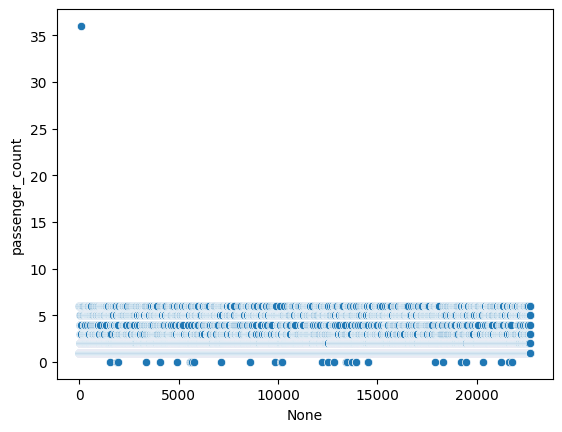

In [29]:
sns.scatterplot(x=trip_df.index, y=trip_df['passenger_count'])

In [31]:
trip_df = trip_df[trip_df['passenger_count'] <= 6]

In [32]:
len(trip_df[trip_df['passenger_count'] == 0])

33

In [36]:
trip_df = trip_df[trip_df['passenger_count'] != 0]

<Axes: xlabel='None', ylabel='passenger_count'>

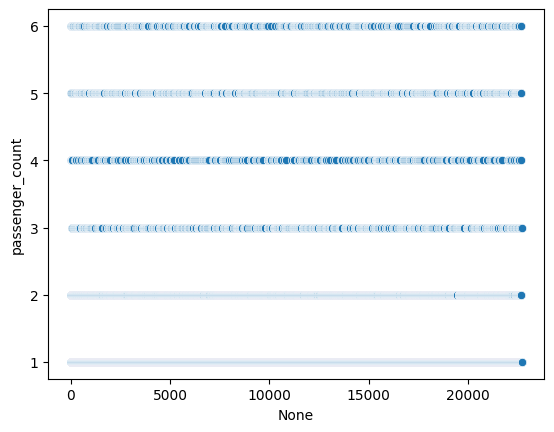

In [37]:
sns.scatterplot(x=trip_df.index, y=trip_df['passenger_count'])

In [38]:
trip_df[trip_df['trip_distance'] == 0]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
129,Linda Kaufman,06/22/2017 8:05:33 AM,06/22/2017 8:05:40 AM,Debit Card,1,0.0,20.0,0.00,0.0
248,Erik Perez,09/18/2017 8:50:53 PM,09/18/2017 8:51:03 PM,Cash,1,0.0,2.5,0.00,0.0
293,Deborah Sanford,10/04/2017 7:46:24 PM,10/04/2017 7:46:50 PM,Cash,1,0.0,2.5,0.00,0.0
321,Ryan Hughes,02/22/2017 4:01:44 AM,02/22/2017 4:01:53 AM,Cash,1,0.0,2.5,0.00,0.0
426,David Parker,01/14/2017 7:00:26 AM,01/14/2017 7:00:53 AM,Cash,1,0.0,2.5,6.70,0.0
...,...,...,...,...,...,...,...,...,...
22192,Angela French,10/16/2017 8:34:07 AM,10/16/2017 8:34:10 AM,Credit Card,1,0.0,2.5,0.00,0.0
22327,Kelsey Rogers,07/21/2017 11:30:29 PM,07/21/2017 11:31:12 PM,Debit Card,1,0.0,16.8,3.42,0.0
22385,Joseph Castillo,01/07/2017 4:48:42 AM,01/07/2017 4:51:03 AM,Cash,1,0.0,10.0,0.00,0.0
22568,Christine Edwards,03/07/2017 2:24:47 AM,03/07/2017 2:24:50 AM,Credit Card,1,0.0,0.0,0.00,0.0


In [39]:
trip_df['trip_distance'].sort_values()

,trip_distance
22672,0.00
19714,0.00
1277,0.00
1207,0.00
11702,0.00
...,...
30,30.83
10293,31.95
6066,32.72
13863,33.92


In [40]:
trip_df.sort_values('trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
22672,John Erickson,03/03/2017 11:09:16 PM,03/03/2017 11:09:35 PM,Debit Card,1,0.00,2.50,0.00,0.00
19714,Joshua Cook,01/05/2017 12:40:16 PM,01/05/2017 12:40:23 PM,Cash,1,0.00,2.50,0.95,0.00
1277,Joseph Aguilar,02/28/2017 5:46:44 AM,02/28/2017 5:46:49 AM,Credit Card,1,0.00,2.50,0.00,0.00
1207,Jessica Mcdonald,01/18/2017 5:53:45 PM,01/18/2017 5:53:45 PM,Cash,1,0.00,2.50,0.00,0.00
11702,Lisa Hobbs,01/03/2017 12:26:09 PM,01/03/2017 12:27:07 PM,Cash,1,0.00,52.00,0.00,5.54
...,...,...,...,...,...,...,...,...,...
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [44]:
trip_df.sort_values('trip_distance').iloc[150:170]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
3611,James Chen,11/19/2017 7:17:16 AM,11/19/2017 7:17:19 AM,Cash,1,0.01,52.0,0.00,0.00
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.5,0.00,0.00
5503,Mike Bishop,08/08/2017 11:28:54 PM,08/08/2017 11:29:00 PM,Credit Card,2,0.01,2.5,0.00,0.00
8199,Steven Brooks,05/16/2017 1:33:23 PM,05/16/2017 1:33:37 PM,Cash,1,0.01,52.0,0.00,0.00
4543,Tammy Hansen,01/10/2017 6:25:47 PM,01/10/2017 6:42:09 PM,Debit Card,5,0.02,10.5,0.00,0.00
19371,Amanda Taylor,03/24/2017 8:59:58 PM,03/24/2017 9:00:06 PM,Cash,1,0.02,2.5,7.00,0.00
15348,Michael Ferguson,01/17/2017 1:18:24 PM,01/17/2017 1:18:31 PM,Debit Card,1,0.02,2.5,0.00,0.00
5431,Jeffrey Sullivan,12/09/2017 11:56:56 AM,12/09/2017 11:58:13 AM,Cash,1,0.02,52.0,11.71,5.76
16351,Nathan Salazar,05/13/2017 5:42:22 PM,05/13/2017 5:42:45 PM,Cash,1,0.02,2.5,0.00,0.00
13496,Amber Boyd,01/15/2017 5:04:18 AM,01/15/2017 5:04:21 AM,Cash,1,0.02,2.5,0.00,0.00


In [45]:
trip_df = trip_df[trip_df['trip_distance'] != 0]

In [46]:
trip_df.sort_values('trip_distance')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
19646,Michael Solomon,12/13/2017 12:19:29 PM,12/13/2017 12:19:39 PM,Credit Card,1,0.01,52.00,17.57,5.76
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00
5503,Mike Bishop,08/08/2017 11:28:54 PM,08/08/2017 11:29:00 PM,Credit Card,2,0.01,2.50,0.00,0.00
19829,Ms. Sarah Curtis MD,07/14/2017 6:09:54 AM,07/14/2017 6:11:40 AM,Cash,1,0.01,52.00,0.00,5.76
8199,Steven Brooks,05/16/2017 1:33:23 PM,05/16/2017 1:33:37 PM,Cash,1,0.01,52.00,0.00,0.00
...,...,...,...,...,...,...,...,...,...
30,David Burton,11/06/2017 8:30:50 PM,11/07/2017 12:00:00 AM,Credit Card,1,30.83,80.00,18.56,11.52
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.00,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


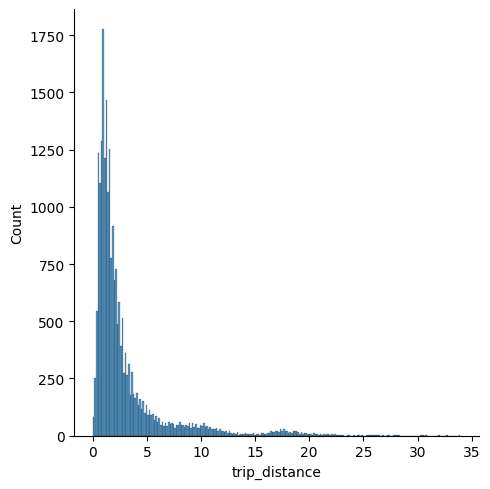

In [47]:
sns.displot(trip_df['trip_distance'])

In [48]:
trip_df.describe()

,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
count,22517.000000,22517.00000,22517.000000,22517.000000,22517.000000
mean,1.645912,2.93201,12.958392,1.829477,0.309597
std,1.285741,3.65714,12.701348,2.766966,1.387242
min,1.000000,0.01000,-120.000000,0.000000,0.000000
25%,1.000000,1.00000,6.500000,0.000000,0.000000
50%,1.000000,1.63000,9.500000,1.360000,0.000000
75%,2.000000,3.09000,14.500000,2.450000,0.000000
max,6.000000,33.96000,999.990000,200.000000,19.100000


In [49]:
len(trip_df[trip_df['fare_amount'] < 0])

13

In [50]:
trip_df = trip_df[trip_df['fare_amount'] > 0]

In [51]:
trip_df.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
22682,Lisa Miller,05/16/2017 6:35:44 AM,05/16/2017 6:35:51 AM,Cash,1,1.30,2.50,0.00,0.00
21595,Timothy Ramirez,04/14/2017 9:18:30 PM,04/14/2017 9:18:32 PM,Credit Card,1,1.20,2.50,0.00,0.00
9190,Valerie Vasquez,03/31/2017 5:29:19 AM,03/31/2017 5:29:32 AM,Cash,1,0.01,2.50,0.00,0.00
17749,Tina Castro,06/13/2017 2:45:20 PM,06/13/2017 2:46:07 PM,Cash,1,0.10,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,152.00,0.00,0.00
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,200.01,51.64,5.76


In [52]:
trip_df = trip_df[trip_df['fare_amount'] < 300]

<Axes: xlabel='None', ylabel='fare_amount'>

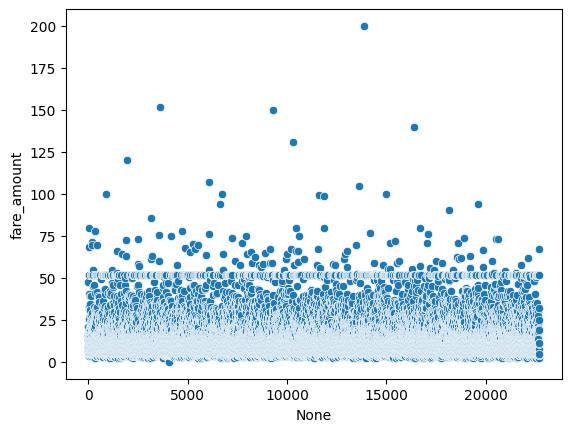

In [54]:
sns.scatterplot(x=trip_df.index, y=trip_df['fare_amount'])

In [55]:
# 방법 1
def fare_func(x):
    if x > 150:
        return 150
    else:
        return x

In [56]:
trip_df['fare_amount'].apply(fare_func)

,fare_amount
0,13.0
1,16.0
2,6.5
3,20.5
4,16.5
...,...
22696,4.0
22697,52.0
22698,4.5
22699,10.5


In [59]:
# 방법 2. lambda 사용
trip_df['fare_amount'] = trip_df['fare_amount'].apply(lambda x: 150 if x > 150 else x)

In [60]:
trip_df.sort_values('fare_amount')

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
4063,Phillip Gonzalez,08/12/2017 8:49:29 PM,08/12/2017 9:18:50 PM,Cash,4,4.50,0.01,0.00,10.50
2225,Travis Dyer,12/17/2017 8:35:28 PM,12/17/2017 8:35:31 PM,Cash,1,10.00,2.50,0.00,0.00
13308,Chelsea Smith,05/16/2017 6:30:45 PM,05/16/2017 6:30:47 PM,Cash,1,8.40,2.50,0.00,0.00
1077,Kyle Johnson,04/12/2017 8:51:58 PM,04/12/2017 8:52:07 PM,Cash,1,2.30,2.50,0.00,0.00
19778,Lisa Cox,12/24/2017 4:29:28 PM,12/24/2017 4:30:23 PM,Cash,1,0.07,2.50,0.00,0.00
...,...,...,...,...,...,...,...,...,...
10293,Emily Stevens,09/11/2017 11:41:04 AM,09/11/2017 12:18:58 PM,Cash,1,31.95,131.00,0.00,0.00
16381,Erica Hernandez,11/30/2017 10:41:11 AM,11/30/2017 11:31:45 AM,Cash,1,25.50,140.00,0.00,16.26
9282,Samantha Frederick,06/18/2017 11:33:25 PM,06/19/2017 12:12:38 AM,Cash,2,33.96,150.00,0.00,0.00
3584,Matthew Chavez,01/01/2017 11:53:01 PM,01/01/2017 11:53:42 PM,Credit Card,1,7.30,150.00,0.00,0.00


<Axes: xlabel='None', ylabel='tip_amount'>

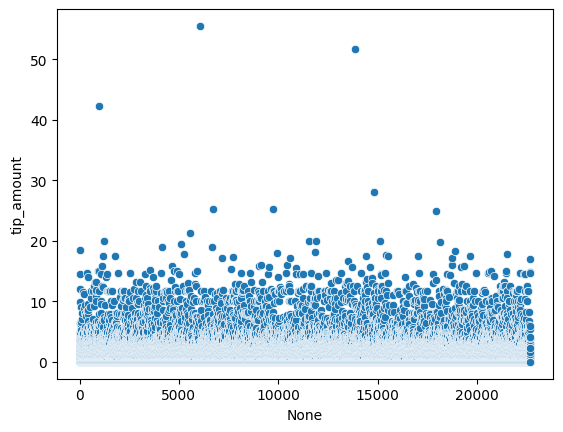

In [62]:
sns.scatterplot(x=trip_df.index, y=trip_df['tip_amount'])

In [64]:
trip_df[trip_df['tip_amount'] > 40]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
986,Elaine Horton,08/23/2017 6:23:26 PM,08/23/2017 7:18:29 PM,Cash,1,16.70,52.0,42.29,0.00
6066,Tina Knight,06/13/2017 12:30:22 PM,06/13/2017 1:37:51 PM,Debit Card,1,32.72,107.0,55.50,16.26
13863,William Yates,05/19/2017 8:20:21 AM,05/19/2017 9:20:30 AM,Credit Card,1,33.92,150.0,51.64,5.76


In [65]:
trip_df = trip_df[trip_df['tip_amount'] < 40]

In [68]:
len(trip_df)

22497

<Axes: xlabel='None', ylabel='tolls_amount'>

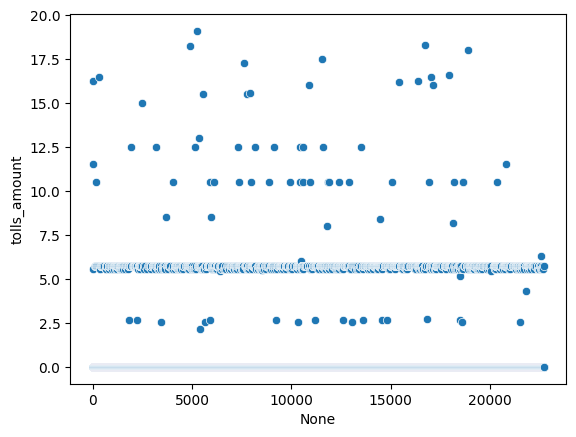

In [70]:
sns.scatterplot(x=trip_df.index, y=trip_df['tolls_amount'])

tolls_amount는 outliers가 없다고 판단하고 그대로 두겠다.

## 텍스트 데이터 처리

In [71]:
trip_df.head(30)

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Debit Card,6,3.34,13.00,2.76,0.00
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Debit Card,1,1.80,16.00,4.00,0.00
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Debit Card,1,1.00,6.50,1.45,0.00
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.50,6.39,0.00
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Debit Card,1,4.37,16.50,0.00,0.00
5,Justin Smith,03/25/2017 8:34:11 PM,03/25/2017 8:42:11 PM,Debit Card,6,2.30,9.00,2.06,0.00
6,Tonya Moreno,05/03/2017 7:04:09 PM,05/03/2017 8:03:47 PM,Cash,1,12.83,47.50,9.86,0.00
7,Hannah Foley,08/15/2017 5:41:06 PM,08/15/2017 6:03:05 PM,Debit Card,1,2.98,16.00,1.78,0.00
8,Katie Whitney,02/04/2017 4:17:07 PM,02/04/2017 4:29:14 PM,Cash,1,1.20,9.00,0.00,0.00
9,Amanda Jones,11/10/2017 3:20:29 PM,11/10/2017 3:40:55 PM,Cash,1,1.60,13.00,2.75,0.00


In [73]:
# 카테고리 형태 데이터에서 고윳값 확인하기
trip_df['payment_method'].unique()

array(['Debit Card', 'Cash', 'Credit Card'], dtype=object)

In [74]:
trip_df['payment_method'].nunique()

3

In [75]:
trip_df['payment_method'].value_counts()

,count
payment_method,
Cash,11096
Debit Card,5729
Credit Card,5672


Debit Card, Credit Card를 모두 Card로 바꾸고자 한다.


In [78]:
trip_df['payment_method'] = trip_df['payment_method'].replace({'Debit Card': 'Card', 'Credit Card': 'Card'})

In [79]:
trip_df['payment_method'].value_counts()

,count
payment_method,
Card,11401
Cash,11096


passenger_name에서 First name을 제거해 보자.

In [80]:
trip_df['passenger_name'].str.split(expand=True)

,0,1,2,3
0,Pamela,Duffy,None,None
1,Michelle,Foster,None,None
2,Tina,Combs,None,None
3,Anthony,Ray,None,None
4,Brianna,Johnson,None,None
...,...,...,...,...
22696,Austin,Johnson,None,None
22697,Monique,Williams,None,None
22698,Drew,Graves,None,None
22699,Jonathan,Copeland,None,None


In [81]:
trip_df['passenger_first_name'] = trip_df['passenger_name'].str.split(expand=True)[0]

날짜/시간 데이터 tpep_pickup_datetime, tpep_dropoff_datetime 의 타입을 datetime으로 변경해 보자.

In [82]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name
0,Pamela Duffy,03/25/2017 8:55:43 AM,03/25/2017 9:09:47 AM,Card,6,3.34,13.0,2.76,0.0,Pamela
1,Michelle Foster,04/11/2017 2:53:28 PM,04/11/2017 3:19:58 PM,Card,1,1.80,16.0,4.00,0.0,Michelle
2,Tina Combs,12/15/2017 7:26:56 AM,12/15/2017 7:34:08 AM,Card,1,1.00,6.5,1.45,0.0,Tina
3,Anthony Ray,05/07/2017 1:17:59 PM,05/07/2017 1:48:14 PM,Cash,1,3.70,20.5,6.39,0.0,Anthony
4,Brianna Johnson,04/15/2017 11:32:20 PM,04/15/2017 11:49:03 PM,Card,1,4.37,16.5,0.00,0.0,Brianna


In [83]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22497 entries, 0 to 22700
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   passenger_name         22497 non-null  object 
 1   tpep_pickup_datetime   22497 non-null  object 
 2   tpep_dropoff_datetime  22497 non-null  object 
 3   payment_method         22497 non-null  object 
 4   passenger_count        22497 non-null  int64  
 5   trip_distance          22497 non-null  float64
 6   fare_amount            22497 non-null  float64
 7   tip_amount             22497 non-null  float64
 8   tolls_amount           22497 non-null  float64
 9   passenger_first_name   22497 non-null  object 
dtypes: float64(4), int64(1), object(5)
memory usage: 2.4+ MB


In [85]:
trip_df['tpep_pickup_datetime'] =pd.to_datetime(trip_df['tpep_pickup_datetime'])

In [86]:
trip_df['tpep_dropoff_datetime'] =pd.to_datetime(trip_df['tpep_dropoff_datetime'])

In [88]:
trip_df['travel_time'] = trip_df['tpep_dropoff_datetime'] - trip_df['tpep_pickup_datetime']

In [89]:
trip_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 22497 entries, 0 to 22700
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype          
---  ------                 --------------  -----          
 0   passenger_name         22497 non-null  object         
 1   tpep_pickup_datetime   22497 non-null  datetime64[ns] 
 2   tpep_dropoff_datetime  22497 non-null  datetime64[ns] 
 3   payment_method         22497 non-null  object         
 4   passenger_count        22497 non-null  int64          
 5   trip_distance          22497 non-null  float64        
 6   fare_amount            22497 non-null  float64        
 7   tip_amount             22497 non-null  float64        
 8   tolls_amount           22497 non-null  float64        
 9   passenger_first_name   22497 non-null  object         
 10  travel_time            22497 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), float64(4), int64(1), object(3), timedelta64[ns](1)
memory usage: 2.6+ MB


In [90]:
trip_df['travel_time'].dt.seconds

,travel_time
0,844
1,1590
2,432
3,1815
4,1003
...,...
22696,196
22697,2448
22698,248
22699,716


In [91]:
trip_df['travel_time'] = trip_df['travel_time'].dt.seconds

## feature engneering

In [93]:
trip_df.head()

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time
0,Pamela Duffy,2017-03-25 08:55:43,2017-03-25 09:09:47,Card,6,3.34,13.0,2.76,0.0,Pamela,844
1,Michelle Foster,2017-04-11 14:53:28,2017-04-11 15:19:58,Card,1,1.80,16.0,4.00,0.0,Michelle,1590
2,Tina Combs,2017-12-15 07:26:56,2017-12-15 07:34:08,Card,1,1.00,6.5,1.45,0.0,Tina,432
3,Anthony Ray,2017-05-07 13:17:59,2017-05-07 13:48:14,Cash,1,3.70,20.5,6.39,0.0,Anthony,1815
4,Brianna Johnson,2017-04-15 23:32:20,2017-04-15 23:49:03,Card,1,4.37,16.5,0.00,0.0,Brianna,1003


In [94]:
trip_df['total_amount'] = trip_df['fare_amount'] + trip_df['tip_amount'] + trip_df['tolls_amount']

<Axes: xlabel='fare_amount', ylabel='trip_distance'>

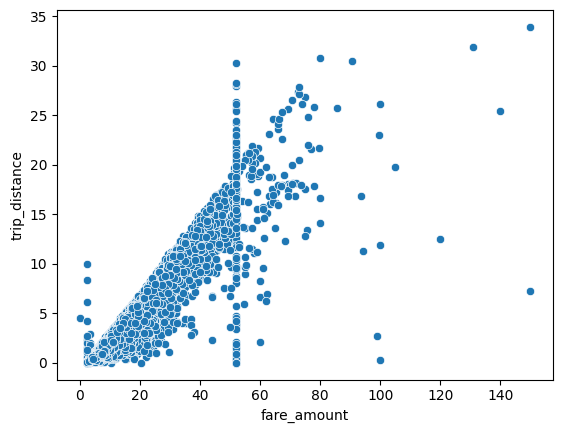

In [96]:
sns.scatterplot(x=trip_df['fare_amount'], y=trip_df['trip_distance'])

<Axes: xlabel='fare_amount', ylabel='travel_time'>

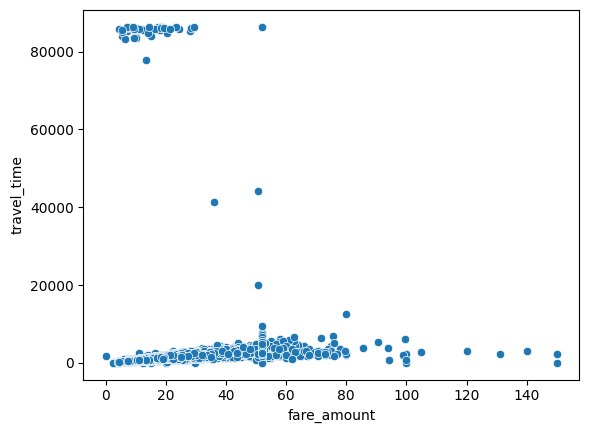

In [97]:
sns.scatterplot(x=trip_df['fare_amount'], y=trip_df['travel_time'])

<Axes: xlabel='trip_distance', ylabel='travel_time'>

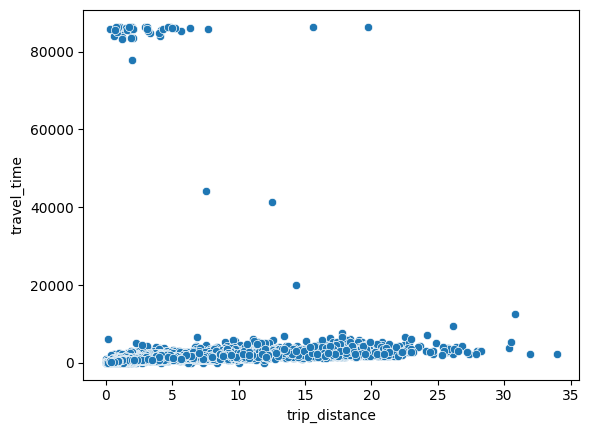

In [98]:
sns.scatterplot(x=trip_df['trip_distance'], y=trip_df['travel_time'])

In [99]:
trip_df[trip_df['travel_time'] > 60000]

,passenger_name,tpep_pickup_datetime,tpep_dropoff_datetime,payment_method,passenger_count,trip_distance,fare_amount,tip_amount,tolls_amount,passenger_first_name,travel_time,total_amount
699,Scott Garcia,2017-06-10 21:55:01,2017-06-11 21:45:51,Card,1,1.36,8.5,1.47,0.00,Scott,85850,9.97
926,Michael Perez,2017-02-09 23:24:58,2017-02-10 23:24:31,Cash,5,4.86,17.5,0.00,0.00,Michael,86373,17.50
1012,James Anderson,2017-12-08 07:17:20,2017-12-09 07:07:22,Cash,1,0.33,4.5,0.00,0.00,James,85802,4.50
1201,Carla Allen,2017-11-12 19:52:44,2017-11-13 19:37:35,Card,1,4.14,18.0,3.76,0.00,Carla,85491,21.76
1357,Jamie Collins,2017-04-17 21:26:49,2017-04-18 20:46:13,Cash,6,4.09,15.0,0.00,0.00,Jamie,83964,15.00
1760,Ronald Kidd,2017-12-28 23:58:24,2017-12-29 23:38:45,Cash,1,1.23,7.0,1.66,0.00,Ronald,85221,8.66
4602,Brandon Miller,2017-12-20 08:24:34,2017-12-21 07:39:27,Cash,4,1.26,10.0,0.00,0.00,Brandon,83693,10.00
5372,Catherine Ray,2017-12-13 19:40:05,2017-12-14 19:31:09,Cash,3,0.93,12.0,2.07,0.00,Catherine,85864,14.07
5480,Patricia Galvan,2017-09-19 13:16:13,2017-09-20 12:36:12,Card,1,0.62,5.5,0.00,0.00,Patricia,83999,5.50
6495,Travis Tucker,2017-06-27 16:52:07,2017-06-28 16:49:57,Cash,1,15.60,52.0,0.00,0.00,Travis,86270,52.00


60000초 이상의 운행 시간(travel_time)에서 거리는 길지 않은 케이스들을 확인할 수 있다.  

-> 이런 이상치들을 제거한다면 좀 더 신뢰할 수 있는 데이터를 얻을 수 있다.